##### ARMA 모델

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

#### 1. 데이터 생성


In [4]:
np.random.seed(0)
n = 100
ar_params = [0.7]
ma_params = [0.4, -0.2]
residuals = np.random.normal(0,1,n)

#### 2. ARMA (1,2) 모델 및 데이터프레임 생성

In [6]:
data = [0,0]
for i in range(2, n):
    ar_term = ar_params[0] * data[i-1]
    ma_term = ma_params[0] + residuals[i-1] + ma_params[1] * residuals[i-2]
    data.append(ar_term + ma_term + residuals[i])
    
df = pd.DataFrame({'Value':data})
print(df)

       Value
0   0.000000
1   0.000000
2   1.426085
3   4.537859
4   7.489205
..       ...
95  4.489652
96  4.188556
97  4.987045
98  5.801614
99  4.632857

[100 rows x 1 columns]


#### 3. ARMA 모델링 실습

In [8]:
# ARMA(1, 2) 모델 적합
model = ARIMA(df['Value'],order=(1, 0, 2))
results = model.fit()

# ARMA(1, 2) 모델 정보 출력
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -156.742
Date:                Thu, 01 Jun 2023   AIC                            323.485
Time:                        09:25:07   BIC                            336.511
Sample:                             0   HQIC                           328.757
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4511      0.729      1.992      0.046       0.023       2.879
ar.L1          0.7492      0.114      6.587      0.000       0.526       0.972
ma.L1          0.7037      0.162      4.350      0.0

#### 4. 시각화

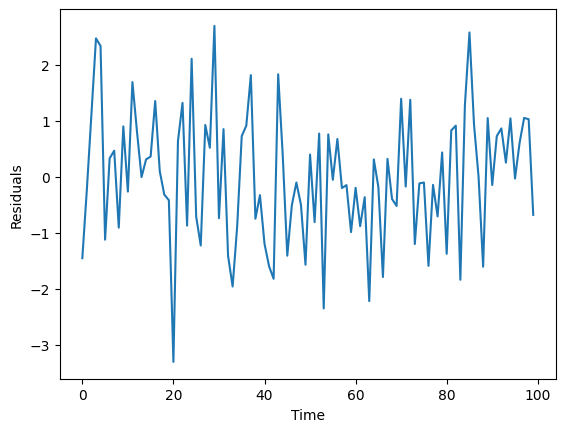

In [9]:
# 잔차 시계열 그래프 출력
plt.plot(results.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()